In [1]:
import pandas as pd
from api_keys import apify_key
import json
import requests
import hvplot.pandas
import holoviews as hv
import geoviews as gv


C:\Users\tadip\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
%%capture --no-display
%run Burlington_Data_2021.ipynb

In [3]:
%%capture --no-display
%run Oshawa.ipynb

In [4]:
%%capture --no-display
%run Housing.ipynb

In [5]:
%%capture --no-display
%run Vaughan.ipynb

In [6]:
%%capture --no-display
%run "Milton Analysis Project 1 Bootcamp.ipynb"

In [7]:
all_cities_df = pd.concat([burlington_final_df, Oakville_df, vaughan_df, cleaned_milton_df, Oshawa_df])
all_cities_df = all_cities_df.iloc[:, :-1]
all_cities_df = all_cities_df.replace({'\$': '', ',': '', '%': ''}, regex=True)
all_cities_df = all_cities_df.astype(float)
all_cities_df

Population  Household Income ($)  Average Rent ($)  \
City       Year                                                        
Burlington 2016     183314.0              123402.0            2710.0   
           2021     186948.0              140200.0            2862.0   
Oakville   2016     193832.0              113666.0            3154.0   
            2021    213759.0              128000.0            3363.0   
Vaughan    2016     306233.0               90615.0            2492.0   
            2021    323103.0              124000.0            2841.0   
Milton     2016     110128.0              120157.0            2821.0   
           2021     132979.0              142600.0            2785.0   
Oshawa     2016     159458.0               70211.0            1070.0   
            2021    175383.0               86000.0            1400.0   

                  Median Rent ($)  Estimated House Value ($)  \
City       Year                                                
Burlington 2016            2400.0                   632556.0   
           2021            2800.0                  1024000.0   
Oakville   2016            2588.0                   883853.0   
            2021           3000.0                  1388000.0   
Vaughan    2016            2300.0                   893065.0   
            2021           2550.0                  1282000.0   
Milton     2016            2150.0                   622911.0   
           2021            2650.0                  1022000.0   
Oshawa     2016            1015.0                   397934.0   
            2021           1300.0                   705000.0   

                  Unemployment Rate (%)  Property Tax Rate (%)  Rented Houses  \
City       Year                                                                 
Burlington 2016                     5.6               0.871013        16835.0   
           2021                    10.7               0.779583        18220.0   
Oakville   2016                     6.9               0.830000        12135.0   
            2021                   11.7               0.720000        16530.0   
Vaughan    2016                     5.8               0.815855         9765.0   
            2021                   12.5               0.669976        14620.0   
Milton     2016                     5.6               0.006820         4840.0   
           2021                    11.4               0.007449         6950.0   
Oshawa     2016                     9.8               1.561085        19720.0   
            2021                   15.2               1.304741        23880.0   

                  Owned Houses  New Built  Average Sale Price ($)  \
City       Year                                                     
Burlington 2016        54540.0      542.0                663675.0   
           2021        54955.0     1494.0               1081961.0   
Oakville   2016        54130.0     1791.0               1063117.0   
            2021       57025.0     1824.0               1579928.0   
Vaughan    2016        84490.0     2270.0                656698.0   
            2021       89290.0     5564.0               1299913.0   
Milton     2016        29415.0      891.0                657525.0   
           2021        33085.0     1073.0               1104704.0   
Oshawa     2016        42875.0      834.0                443635.0   
            2021       42750.0     1416.0                798221.0   

                  Median Sale Price ($)  
City       Year                          
Burlington 2016                609000.0  
           2021                975500.0  
Oakville   2016                920000.0  
            2021              1387500.0  
Vaughan    2016                600000.0  
            2021              1200000.0  
Milton     2016                621000.0  
           2021                990000.0  
Oshawa     2016                420000.0  
            2021               765000.0

In [8]:
all_amenities_df = pd.concat([burlington_amenities_df, Oakville_amenities_df, vaughan_amenities_df, milton_leisure_df, Oshawa_amenities_df])
all_amenities_df = all_amenities_df.astype(int)
all_amenities_df=all_amenities_df.iloc[:,:]
all_amenities_df

,# of Public Schools,# of Catholic Schools,# of Private Schools,# of Leisure Spaces
City,,,,
Burlington,38,17,2,282
Oakville,39,28,32,428
Vaughan,41,46,46,251
Milton,21,14,4,234
Oshawa,32,15,8,356


# Comparison between Estimated House Value vs Average Sale Price (both years on one bar graph)

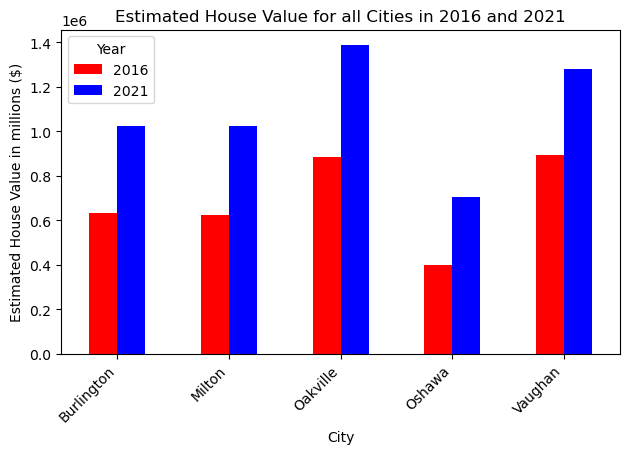

In [9]:
import matplotlib.pyplot as plt

# Reset index to get Year into its own column and change type to integer
all_cities_reset_df = all_cities_df.reset_index(level='Year')
all_cities_reset_df['Year'] = all_cities_reset_df['Year'].astype(int)

# Filter the DataFrame to include only the relevant columns
est_house_value_df = all_cities_reset_df[['Year', 'Estimated House Value ($)']]

# Pivot the DataFrame to have 'Year' as the columns
estimated_house = est_house_value_df.pivot(columns='Year', values='Estimated House Value ($)')

# Plot the bar graph
estimated_house.plot(kind='bar', color=['red', 'blue'])
plt.title('Estimated House Value for all Cities in 2016 and 2021')
plt.ylabel('Estimated House Value in millions ($)')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Year')
plt.tight_layout()
plt.show()

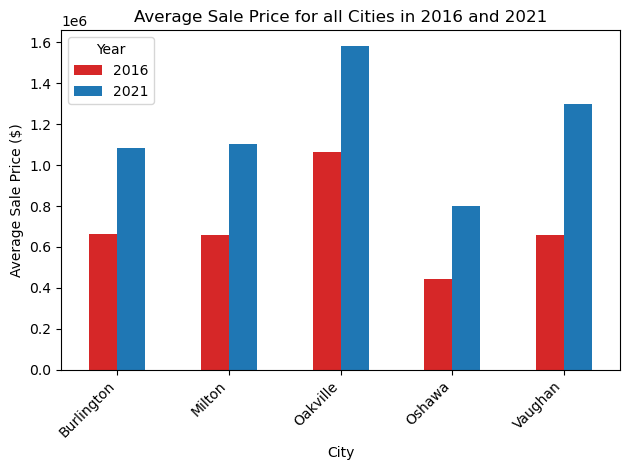

In [10]:
avg_sale_price_df = all_cities_reset_df[['Year', 'Average Sale Price ($)']]

average_sale = avg_sale_price_df.pivot(columns='Year', values='Average Sale Price ($)')

# Plot the bar graph
average_sale.plot(kind='bar', color=['tab:red', 'tab:blue'])
plt.title('Average Sale Price for all Cities in 2016 and 2021')
plt.ylabel('Average Sale Price ($)')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [11]:
estimated_avg_sale_df = all_cities_df[['Estimated House Value ($)','Average Sale Price ($)']]
estimated_avg_sale_df

Estimated House Value ($)  Average Sale Price ($)
City       Year                                                    
Burlington 2016                    632556.0                663675.0
           2021                   1024000.0               1081961.0
Oakville   2016                    883853.0               1063117.0
            2021                  1388000.0               1579928.0
Vaughan    2016                    893065.0                656698.0
            2021                  1282000.0               1299913.0
Milton     2016                    622911.0                657525.0
           2021                   1022000.0               1104704.0
Oshawa     2016                    397934.0                443635.0
            2021                   705000.0                798221.0

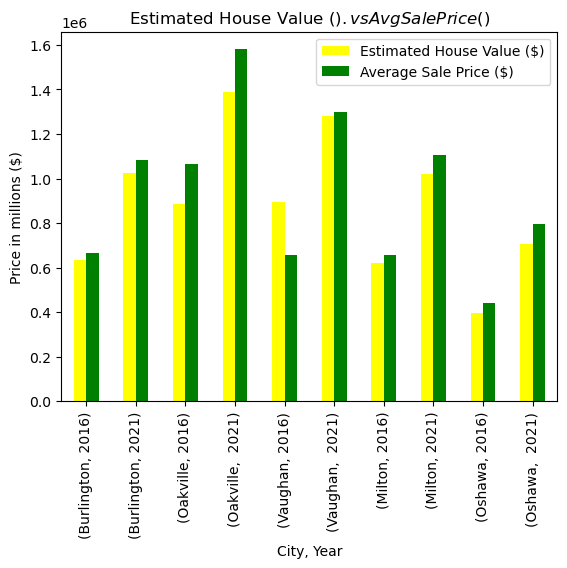

<Figure size 640x480 with 0 Axes>

In [12]:
#%matplotlib inline
graph = estimated_avg_sale_df.plot(kind = 'bar', title='Estimated House Value ($). vs Avg Sale Price ($)', color=["yellow", "green"])
graph.set_xlabel("City, Year")
graph.set_ylabel("Price in millions ($)")
plt.show()
plt.tight_layout()

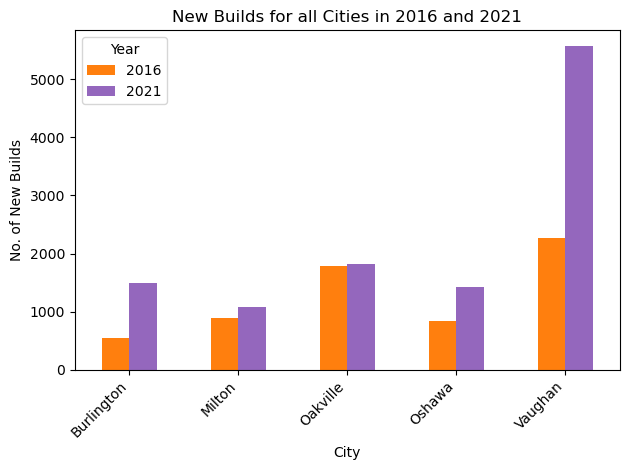

In [13]:
new_built_df = all_cities_reset_df[['Year', 'New Built']]

new_builds = new_built_df.pivot(columns='Year', values='New Built')

# Plot the bar graph
new_builds.plot(kind='bar', color=['tab:orange', 'tab:purple'])
plt.title('New Builds for all Cities in 2016 and 2021')
plt.ylabel('No. of New Builds')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Unemployment Rate

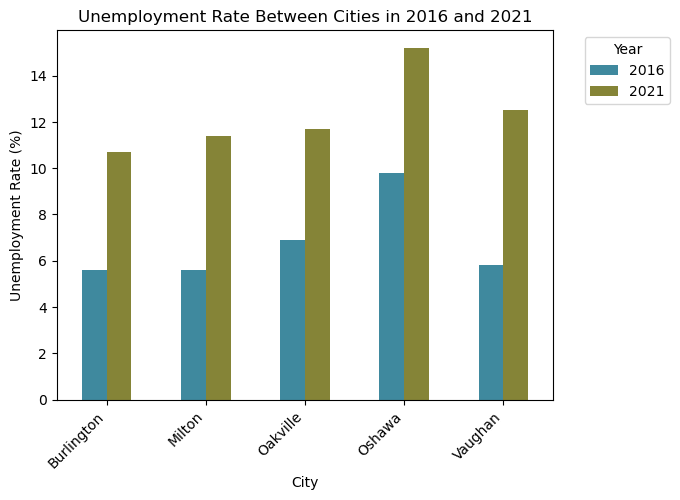

In [14]:
import matplotlib.pyplot as plt

# Reset index to get Year into its own column and change type to integer
all_cities_reset_df = all_cities_df.reset_index(level='Year')
all_cities_reset_df['Year'] = all_cities_reset_df['Year'].astype(int)

# Filter the DataFrame to include only the relevant columns
unemployment_df = all_cities_reset_df[['Year', 'Unemployment Rate (%)']]

# Pivot the DataFrame to have 'Year' as the columns
unemployment_pivot = unemployment_df.pivot(columns='Year', values='Unemployment Rate (%)')

# Plot the bar graph
unemployment_pivot.plot(kind='bar', stacked=False,color=['#3f899e', '#858437'])
plt.title('Unemployment Rate Between Cities in 2016 and 2021')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.legend(title='Year', bbox_to_anchor=(1.25, 1))
plt.show()

# Total number of leisure places per city

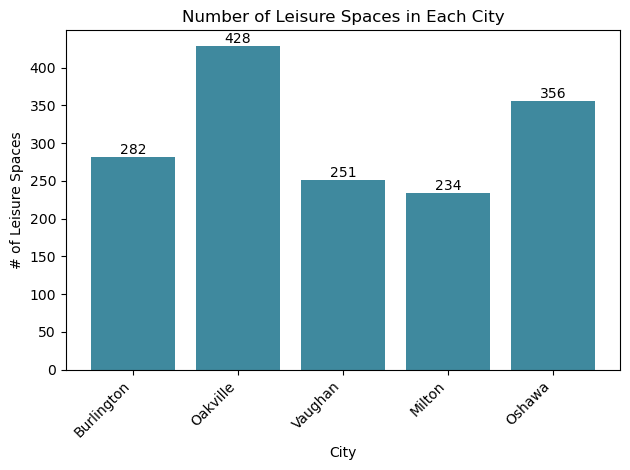

In [15]:
import matplotlib.pyplot as plt

# Reset index to get Year into its own column and change type to integer
all_amenities_reset_df = all_amenities_df.reset_index(level='City')
all_amenities_reset_df['City'] = all_amenities_reset_df['City']

# Filter the DataFrame to include only the relevant columns
leisure_df = all_amenities_reset_df[['City', '# of Leisure Spaces']]

# Extracting data for the bar graph
cities = leisure_df['City']
leisure_spaces = leisure_df['# of Leisure Spaces']

# Create Graph
bars = plt.bar(cities, leisure_spaces, color='#3f899e')
plt.xlabel('City')
plt.ylabel('# of Leisure Spaces')
plt.title('Number of Leisure Spaces in Each City')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability

# Adding count numbers to the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()

plt.show()

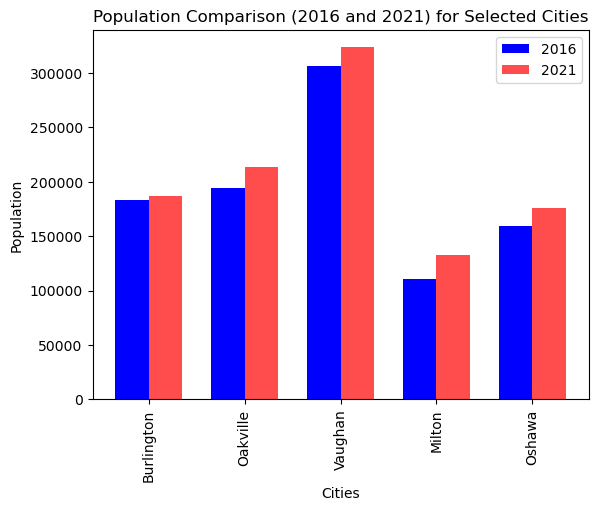

In [16]:
years = ['2016', '2021']
cities = ['Burlington', 'Oakville', 'Vaughan', 'Milton', 'Oshawa']
bar_width=0.35

y_value_1 = [
    all_cities_df.loc[('Burlington', 2016), 'Population'],
    all_cities_df.loc[('Oakville', '2016'), 'Population'],
    all_cities_df.loc[('Vaughan', '2016'), 'Population'],
    all_cities_df.loc[('Milton', '2016'), 'Population'],
    all_cities_df.loc[('Oshawa', '2016'), 'Population']
]
y_value_2 = [
    all_cities_df.loc[('Burlington', 2021), 'Population'],
    all_cities_df.loc[('Oakville', ' 2021'), 'Population'],
    all_cities_df.loc[('Vaughan', ' 2021'), 'Population'],
    all_cities_df.loc[('Milton', '2021'), 'Population'],
    all_cities_df.loc[('Oshawa', ' 2021'), 'Population']
]

x_axis = np.arange(len(cities))

plt.bar(x_axis - bar_width/2, y_value_1, color="b", width=bar_width, align="center", label='2016')
plt.bar(x_axis + bar_width/2, y_value_2, color="r", width=bar_width, align="center", label='2021', alpha=0.7)

plt.xticks(x_axis, cities, rotation="vertical")
plt.xlabel('Cities')
plt.ylabel('Population')
plt.title('Population Comparison (2016 and 2021) for Selected Cities')
plt.legend()
plt.show()

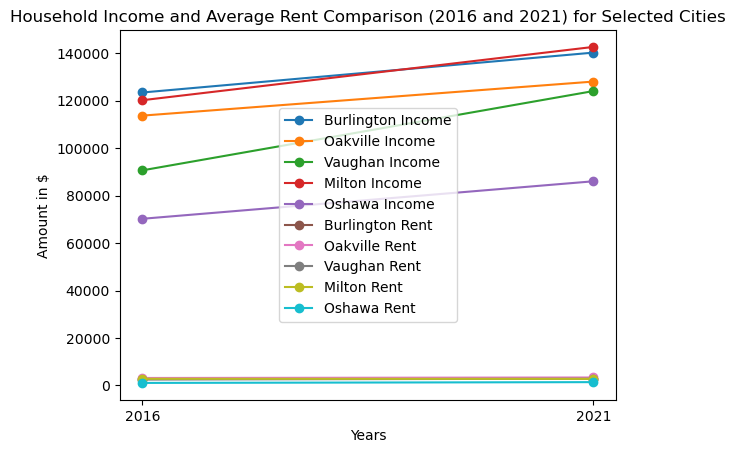

In [17]:
years = ['2016', '2021']
cities = ['Burlington', 'Oakville', 'Vaughan', 'Milton', 'Oshawa']

B_income_2016 = all_cities_df.loc[('Burlington', 2016), 'Household Income ($)'], all_cities_df.loc[('Burlington', 2021), 'Household Income ($)']
Oa_income_2016 = all_cities_df.loc[('Oakville', '2016'), 'Household Income ($)'], all_cities_df.loc[('Oakville', ' 2021'), 'Household Income ($)']
V_income_2016 = all_cities_df.loc[('Vaughan', '2016'), 'Household Income ($)'], all_cities_df.loc[('Vaughan', ' 2021'), 'Household Income ($)']
M_income_2016 = all_cities_df.loc[('Milton', '2016'), 'Household Income ($)'], all_cities_df.loc[('Milton', '2021'), 'Household Income ($)']
Os_income_2016 = all_cities_df.loc[('Oshawa', '2016'), 'Household Income ($)'], all_cities_df.loc[('Oshawa', ' 2021'), 'Household Income ($)']

B_rent_2016 = all_cities_df.loc[('Burlington', 2016), 'Average Rent ($)'], all_cities_df.loc[('Burlington', 2021), 'Average Rent ($)']
Oa_rent_2016 = all_cities_df.loc[('Oakville', '2016'), 'Average Rent ($)'], all_cities_df.loc[('Oakville', ' 2021'), 'Average Rent ($)'] 
V_rent_2016 = all_cities_df.loc[('Vaughan', '2016'), 'Average Rent ($)'], all_cities_df.loc[('Vaughan', ' 2021'), 'Average Rent ($)'] 
M_rent_2016 = all_cities_df.loc[('Milton', '2016'), 'Average Rent ($)'], all_cities_df.loc[('Milton', '2021'), 'Average Rent ($)'] 
Os_rent_2016 = all_cities_df.loc[('Oshawa', '2016'), 'Average Rent ($)'], all_cities_df.loc[('Oshawa', ' 2021'), 'Average Rent ($)'] 
x_axis = years

plt.plot(x_axis, B_income_2016, label='Burlington Income', marker='o')
plt.plot(x_axis, Oa_income_2016, label='Oakville Income ', marker='o')
plt.plot(x_axis, V_income_2016, label='Vaughan Income ', marker='o')
plt.plot(x_axis, M_income_2016, label='Milton Income ', marker='o')
plt.plot(x_axis, Os_income_2016, label='Oshawa Income ', marker='o')
plt.plot(x_axis, B_rent_2016, label='Burlington Rent ', marker='o')
plt.plot(x_axis, Oa_rent_2016, label='Oakville Rent ', marker='o')
plt.plot(x_axis, V_rent_2016, label='Vaughan Rent ', marker='o')
plt.plot(x_axis, M_rent_2016, label='Milton Rent ', marker='o')
plt.plot(x_axis, Os_rent_2016, label='Oshawa Rent ', marker='o')

plt.xlabel('Years')
plt.ylabel('Amount in $')
plt.title('Household Income and Average Rent Comparison (2016 and 2021) for Selected Cities')

plt.legend()

plt.show()

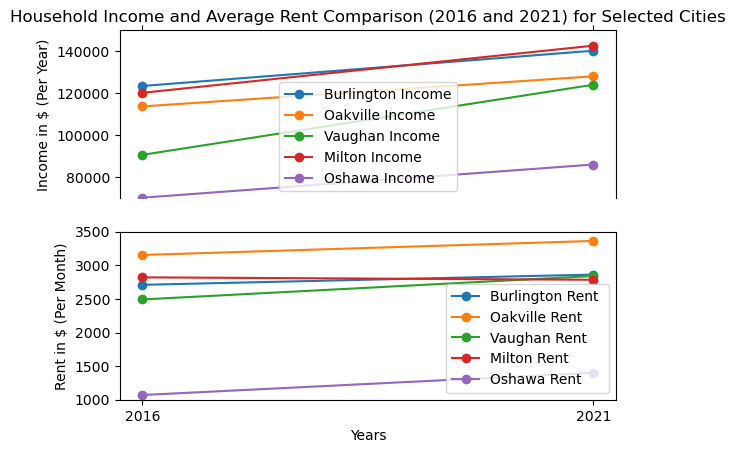

In [18]:
x_axis = years

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1]})

ax1.plot(x_axis, B_income_2016, label='Burlington Income', marker='o')
ax1.plot(x_axis, Oa_income_2016, label='Oakville Income ', marker='o')
ax1.plot(x_axis, V_income_2016, label='Vaughan Income ', marker='o')
ax1.plot(x_axis, M_income_2016, label='Milton Income ', marker='o')
ax1.plot(x_axis, Os_income_2016, label='Oshawa Income ', marker='o')

ax1.set_ylabel('Income in $ (Per Year)')
ax1.set_ylim(70000, 150000)
ax2.set_ylim(1000, 3500)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')

ax2.plot(x_axis, B_rent_2016, label='Burlington Rent ', marker='o')
ax2.plot(x_axis, Oa_rent_2016, label='Oakville Rent ', marker='o')
ax2.plot(x_axis, V_rent_2016, label='Vaughan Rent ', marker='o')
ax2.plot(x_axis, M_rent_2016, label='Milton Rent ', marker='o')
ax2.plot(x_axis, Os_rent_2016, label='Oshawa Rent ', marker='o')

ax2.set_xlabel('Years')
ax2.set_ylabel('Rent in $ (Per Month)')
ax1.set_title('Household Income and Average Rent Comparison (2016 and 2021) for Selected Cities')

ax1.legend(loc='best')
ax2.legend(loc='best')

plt.show()

In [19]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

**<font size =5> School Graph <font>***

In [20]:
#Adding the total number of schools
city = all_amenities_df.index
city

Index(['Burlington', 'Oakville', 'Vaughan', 'Milton', 'Oshawa'], dtype='object', name='City')

In [21]:
total = []
counter = 0
for i,c in enumerate(city):
    if c == city[0]:
        Total = all_amenities_df['# of Public Schools'][i]+all_amenities_df['# of Catholic Schools'][i]+all_amenities_df['# of Private Schools'][i]
        total.append(Total)
        counter=+1
    else:
        coutner=+1
        Total = all_amenities_df['# of Public Schools'][i]+all_amenities_df['# of Catholic Schools'][i]+all_amenities_df['# of Private Schools'][i]
        total.append(Total)
print(total)        

[57, 99, 133, 39, 55]


In [22]:
all_amenities_df["Total # of Schools"] = total
all_amenities_df = all_amenities_df[["# of Public Schools","# of Catholic Schools",
                                      "# of Private Schools","Total # of Schools"]]
all_amenities_df

,# of Public Schools,# of Catholic Schools,# of Private Schools,Total # of Schools
City,,,,
Burlington,38,17,2,57
Oakville,39,28,32,99
Vaughan,41,46,46,133
Milton,21,14,4,39
Oshawa,32,15,8,55


<Axes: title={'center': 'Number of schools by type per cities'}, xlabel='City', ylabel='Total Number of Schools'>

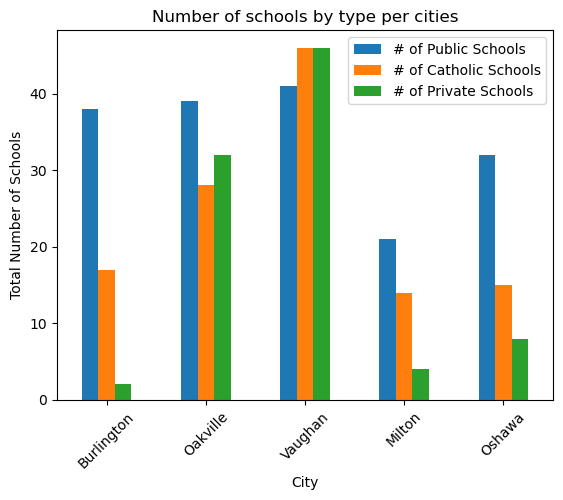

In [23]:
all_amenities_df[["# of Public Schools","# of Catholic Schools","# of Private Schools"]].plot(kind = 'bar',
                                                                        title = 'Number of schools by type per cities',
                                                                        ylabel = 'Total Number of Schools',
                                                                         rot = 45)

**<font size = 5> Owned vs Rented Houses <font>**

In [24]:
#Extract a df from the all_cities_df
rented_vs_owned = all_cities_df[['Owned Houses',"Rented Houses"]]
rented_vs_owned

Owned Houses  Rented Houses
City       Year                              
Burlington 2016        54540.0        16835.0
           2021        54955.0        18220.0
Oakville   2016        54130.0        12135.0
            2021       57025.0        16530.0
Vaughan    2016        84490.0         9765.0
            2021       89290.0        14620.0
Milton     2016        29415.0         4840.0
           2021        33085.0         6950.0
Oshawa     2016        42875.0        19720.0
            2021       42750.0        23880.0

<Axes: title={'center': 'Owned Houses vs Rented Houses in 2016 and 2021 per city'}, xlabel='City,Year', ylabel='Number of Houses'>

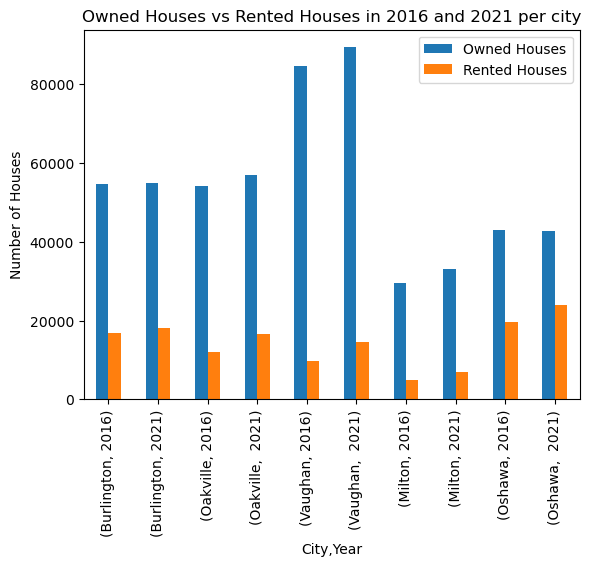

In [25]:
#Version 1
%matplotlib inline
rented_vs_owned.plot(kind = 'bar', title = "Owned Houses vs Rented Houses in 2016 and 2021 per city", rot =90,
                    ylabel = "Number of Houses")

In [26]:
rented_vs_owned = all_cities_df[["Population","Owned Houses","Rented Houses"]]


The correlation between the increase of population and owned houses is 0.9895626575881576
The correlation between the increase of population and rented houses is 0.10872582127899905


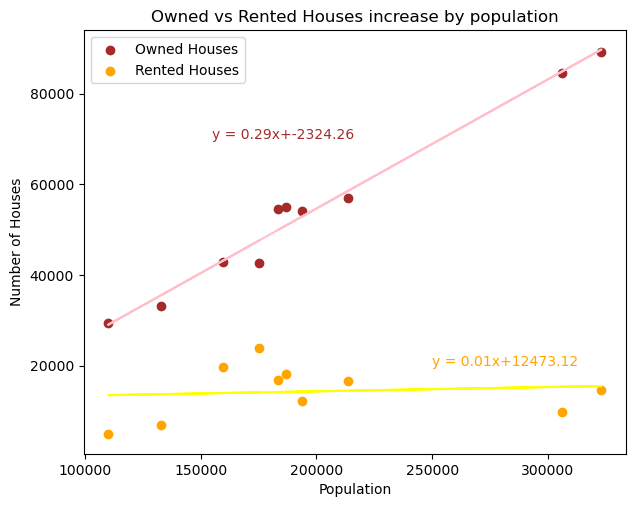

In [27]:
#Determining my axis
x_axis = rented_vs_owned["Population"]
y_axis = rented_vs_owned["Owned Houses"]
y_axis2 = rented_vs_owned["Rented Houses"]


#Plotting the chart
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, color = 'brown',label='Owned Houses')
ax.scatter(x_axis, y_axis2, color = 'orange',label='Rented Houses')
plt.xlabel ("Population")
plt.ylabel ("Number of Houses")
plt.title('Owned vs Rented Houses increase by population')
plt.legend()

#Adding regression lines
output_owned_houses = st.linregress(x_axis, y_axis)
output_rented_houses = st.linregress(x_axis, y_axis2)
slope1 = output_owned_houses[0]
slope2 = output_rented_houses[0]
intercept1 = output_owned_houses[1]
intercept2 = output_rented_houses[1]
regressline1 = slope1*x_axis+intercept1
regressline2 = slope2*x_axis+intercept2
line_eq1 = f'y = {round(slope1,2)}x+{round(intercept1,2)}'
line_eq2 = f'y = {round(slope2,2)}x+{round(intercept2,2)}'
corr1 = np.corrcoef(x_axis,y_axis)
corr2 = np.corrcoef(x_axis,y_axis2)
#Displaying the regression lines
plt.plot(x_axis,regressline1, color = 'pink')
plt.plot(x_axis,regressline2, color = 'yellow')
plt.annotate(line_eq1,(155000,70000), color = 'brown')
plt.annotate(line_eq2,(250000,20000),color = 'orange')
fig.set_figheight(5.5)
fig.set_figwidth(7)
plt.plot()

#Correlation coefficients 
corr1 = np.corrcoef(x_axis,y_axis)
corr2 = np.corrcoef(x_axis,y_axis2)
print(f'The correlation between the increase of population and owned houses is {corr1[1][0]}')
print(f'The correlation between the increase of population and rented houses is {corr2[1][0]}')


In [28]:
#Pie chart
rented_vs_owned = rented_vs_owned.reset_index()
rented_vs_owned['Year'] = rented_vs_owned["Year"].astype(int)
df_2016 = rented_vs_owned.loc[rented_vs_owned['Year']==2016]

In [29]:
df_2021 = rented_vs_owned.loc[rented_vs_owned['Year']==2021]

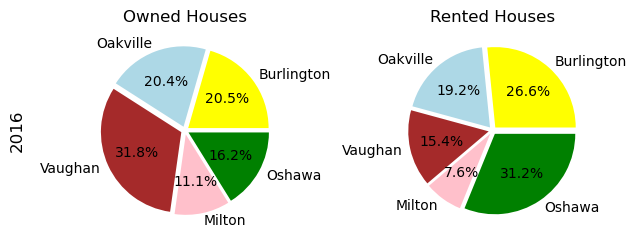

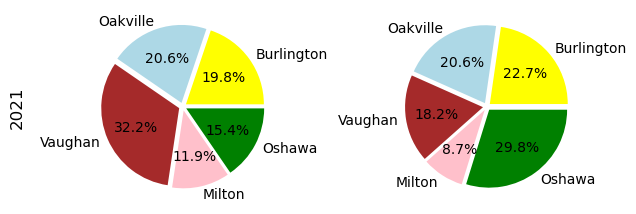

In [30]:
fig, ax1 = plt.subplots(1, 2)

values_o_2016 = df_2016['Owned Houses']
values_r_2016 = df_2016['Rented Houses']
values_o_2021 = df_2021['Owned Houses']
values_r_2021 = df_2021['Rented Houses']
names = df_2016["City"]
colors =['yellow',"lightblue","brown","pink","green"]
explosion =[0.05,0.05,0.05,0.05,0.05]


# ...

ax1[0].pie(values_o_2016,labels = names, colors = colors, autopct = '%1.1f%%', explode = explosion)
ax1[0].set_title('Owned Houses')
#...
ax1[1].pie(values_r_2016,labels = names, colors = colors, autopct = '%1.1f%%',explode = explosion)
ax1[1].set_title('Rented Houses')
fig.supylabel('2016')
fig.tight_layout()



# ...
fig, ax2 = plt.subplots(1, 2)
# ...
ax2[0].pie(values_o_2021,labels = names, colors = colors, autopct = '%1.1f%%',explode = explosion)

# ...
ax2[1].pie(values_r_2021,labels = names, colors = colors, autopct = '%1.1f%%',explode = explosion)
fig.supylabel('2021')
fig.tight_layout()
plt.show()

In [31]:
map_cities = ['Burlington', 'Oakville', 'Oshawa', 'Vaughan', 'Milton']
map_cities_dic = {
    'City': map_cities
}
map_cities_df = pd.DataFrame(map_cities_dic)

map_cities_df['Lat'] = ""
map_cities_df['Lon'] = ""

params = {
    "apiKey":apify_key,
    "format":"json"
}
base_url = "https://api.geoapify.com/v1/geocode/search"
for index, row in map_cities_df.iterrows():


    city = f'{row["City"]} , Ontario, Canada'

    params['text'] = city

    response = requests.get(base_url, params = params).json()

    lat = response['results'][0]['lat']
    lon = response['results'][0]['lon']
    
    map_cities_df.loc[index, "Lat"] = lat
    map_cities_df.loc[index, "Lon"] = lon
map_cities_df.set_index('City', inplace=True)  
map_cities_df

merged_map_df = map_cities_df.merge(all_cities_df['Population'], left_index=True, right_index=True, how='left')
merged_map_df = merged_map_df.reset_index()
merged_map_df

merged_map_df['City'] = merged_map_df['City'].astype('category')
min_pop = merged_map_df['Population'].min()
max_pop = merged_map_df['Population'].max()

merged_map_df['Scaled_Population'] = (
    ((merged_map_df['Population'] - min_pop) / (max_pop - min_pop)) * (900 - 300) + 300
)

final_map = merged_map_df.hvplot.points(
    'Lon', 'Lat', geo=True, tiles="OSM",
    size='Scaled_Population',
    color='City',
    alpha=0.7,
    hover_cols=['City', 'Population'],
    legend=False)
final_map


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lon,Lat]   (City,Scaled_Population,Population)